Which month has the highest rate of of bird strikes?

In [1]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
#Create file path
file = 'Resources/Cleaned_data.csv'
cbs_df = pd.read_csv(file)

#Replace any potential NAs with 0
cbs_df['Fatalities'].fillna(0,inplace = True)

#Not necessary but just in case set type to float
cbs_df["Fatalities"] = cbs_df.loc[:, "Fatalities"].astype(float)
cbs_df

/Users/rafael/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990.0,1.0,1.0,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,129779,1990.0,1.0,1.0,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2258,1990.0,1.0,3.0,MIL,MILITARY,A-10A,A,345,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2257,1990.0,1.0,3.0,MIL,MILITARY,F-16,A,561,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,129734,1990.0,1.0,4.0,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137524,366091,2015.0,9.0,30.0,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137525,365902,2015.0,9.0,30.0,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137526,365903,2015.0,9.0,30.0,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137527,366046,2015.0,9.0,30.0,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Calculate the total amount of bird hits by month = "numerical value"
month_counts = cbs_df["Incident Month"].value_counts(sort=False)
month_counts

1.0      4698
2.0      4307
10.0    17185
3.0      6929
9.0     18740
4.0     10239
6.0     10413
5.0     13834
8.0     18090
12.0     5389
11.0     9446
7.0     15340
Name: Incident Month, dtype: int64

In [4]:
#Group the bird hits by month to get the total amount of "Fatalities per month"
month_group = cbs_df.groupby("Incident Month")
#Use sum function instead of value_counts to add the true value of fatalities per month
#and not just how many death occurances per month
fatality_count = month_group["Fatalities"].sum()

#Check the fatality count is 26 like in the csv
fatality_count

Incident Month
1.0     8.0
2.0     1.0
3.0     8.0
4.0     0.0
5.0     2.0
6.0     1.0
7.0     3.0
8.0     0.0
9.0     0.0
10.0    2.0
11.0    0.0
12.0    1.0
Name: Fatalities, dtype: float64

In [5]:
#Find the percent of fatalities per month (total fatalities per month / total bird hits by month)
fatalities_percent_month = (fatality_count / month_counts) * 100
fatalities_percent_month

1.0     0.170285
2.0     0.023218
3.0     0.115457
4.0     0.000000
5.0     0.014457
6.0     0.009603
7.0     0.019557
8.0     0.000000
9.0     0.000000
10.0    0.011638
11.0    0.000000
12.0    0.018556
dtype: float64

In [6]:
#Group bird hits by month to find the total "Injuries" in that month
#again use the sum function to get the total amount of injuries per month and not just occurance
injury_count = month_group["Injuries"].sum()

#Find percent of injuries per month (total injuries per month / total bird hits by month)
injury_percent_month = (injury_count / month_counts) * 100
injury_percent_month

injury_percent_month

1.0     2.447850
2.0     0.557232
3.0     0.432963
4.0     0.244164
5.0     0.173486
6.0     0.412945
7.0     0.136897
8.0     0.127142
9.0     0.149413
10.0    0.128019
11.0    0.243489
12.0    0.334014
dtype: float64

In [7]:
#Create full dataframe with the set of series we have created
full_month_dicts = {"Bird Hits": month_counts,
               "Fatalities": fatality_count,
                "Injuries": injury_count,
                "Fatality Rate Per Month":fatalities_percent_month,
              "Injury Rate Per Month": injury_percent_month}

#Create a dataframe with only fatality and injury rate for comparison purposes and chart
part_month_dicts = {"Fatality Rate Per Month":fatalities_percent_month,
                    "Injury Rate Per Month": injury_percent_month,
                   }

part_month_df = pd.DataFrame(part_month_dicts)
part_month_df

,Fatality Rate Per Month,Injury Rate Per Month
1.0,0.170285,2.447850
2.0,0.023218,0.557232
3.0,0.115457,0.432963
4.0,0.000000,0.244164
5.0,0.014457,0.173486
6.0,0.009603,0.412945
7.0,0.019557,0.136897
8.0,0.000000,0.127142
9.0,0.000000,0.149413
10.0,0.011638,0.128019


In [8]:
#incident_month_name = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#part_month_df["Month"] = incident_month_name

#part_month_df.set_index(['Month'])

#part_month_df

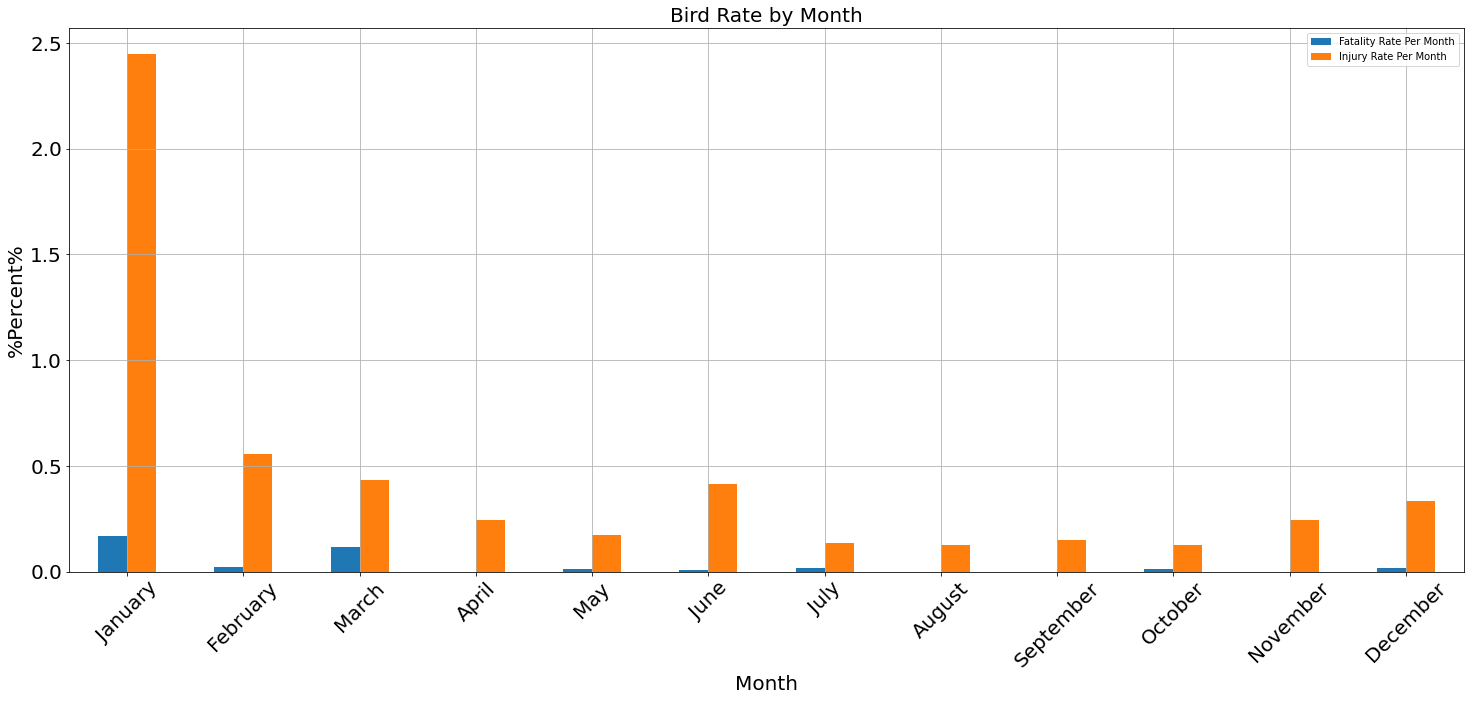

In [9]:
# Create a bar chart based upon the above data
bar_chart=part_month_df.plot(kind='bar', figsize=(25,10),fontsize=20)

#Set the ticks to show each month's label
bar_chart.set_xticklabels( ('January', 'February','March','April','May','June','July','August','September','October','November','December'),rotation=45,fontsize=20 )

#Fix the format of the chart so that the labels are relative to the data box/chart
bar_chart.set_title('Bird Rate by Month',fontsize=20)
bar_chart.set_xlabel('Month',fontsize=20)
bar_chart.set_ylabel('%Percent%',fontsize=20)

plt.grid()
plt.show()